

```
# This is formatted as code
```

# **Programming Assignment No. 4**

---


## *Support Vector Machine*
### Members:
#####       Logroño, Jessie
#####       Pastores, Efren Jr.
#####       Rabe, Gary Clyde




In this assignment, you will train a classifier using Support Vector Machine (SVM) to predict whether a breast tumor is benign (0) or malignant (1).

###**Dataset**
We will use the Breast Cancer Wisconsin dataset, built into sklearn.datasets. The dataset contains 569 samples of breast tumors, with 30 numerical features, including:

* Mean radius
* Mean texture
* Mean perimeter
* Mean area
* Mean smoothness, etc.

The target variable (y) represents tumor status:
* 0 = Benign
* 1 = Malignant

##**Import Necessary Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel

#**General Guidelines**

####**1. Load the dataset using sklearn.datasets.load_breast_cancer().**




In [ ]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to pandas DataFrame and Series
X_df = pd.DataFrame(X, columns=data.feature_names)
y_series = pd.Series(y, name='target')

# Display the Features and Target
print("Features (X):")
display(X_df.head())  # Show the first few rows of the feature set

print("\nTarget (y):")
display(y_series.head())  # Show the first few rows of the target set

Features (X):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Target (y):


,target
0,0
1,0
2,0
3,0
4,0


####**2. Split the dataset into 70% Training and 30% Testing, ensuring class distribution is maintained (use stratify=y in train_test_split).**

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Convert y to pandas Series for easier display
y_series = pd.Series(y, name='Target')
y_train_series = pd.Series(y_train, name='Train Target')
y_test_series = pd.Series(y_test, name='Test Target')

# Display the distribution
print("Original Dataset Distribution:")
display(y_series.value_counts().rename(index={0: 'Benign', 1: 'Malignant'}))

print("\nTraining Set Distribution:")
display(y_train_series.value_counts().rename(index={0: 'Benign', 1: 'Malignant'}))

print("\nTesting Set Distribution:")
display(y_test_series.value_counts().rename(index={0: 'Benign', 1: 'Malignant'}))

Original Dataset Distribution:


,count
Target,
Malignant,357
Benign,212



Training Set Distribution:


,count
Train Target,
Malignant,250
Benign,148



Testing Set Distribution:


,count
Test Target,
Malignant,107
Benign,64


####**3. Preprocess the data:**

*   Use StandardScaler to normalize feature values.

In [ ]:
# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to DataFrames for display
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=data.feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=data.feature_names)

# Display the first few rows of the scaled data
print("Scaled Training Data:")
display(X_train_scaled_df.head())

print("\nScaled Testing Data:")
display(X_test_scaled_df.head())

Scaled Training Data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.709821,-0.258417,-0.637396,-0.711996,1.628430,0.847289,0.166501,0.196420,0.542716,1.347151,...,-0.600068,-0.065867,-0.565662,-0.622613,2.019222,0.186202,0.180187,0.400933,-0.414074,0.445223
1,-0.830331,2.231127,-0.874980,-0.779081,-1.597569,-1.267717,-1.086471,-1.243232,-2.658543,-1.052699,...,-0.897361,1.975153,-0.949574,-0.779331,-1.747652,-1.229372,-1.258947,-1.692788,-2.095723,-1.323417
2,-1.011097,-0.227270,-1.035172,-0.911780,-1.077779,-1.098096,-0.841650,-0.955767,2.023790,-0.688547,...,-1.099685,-0.396544,-1.122706,-0.909132,-1.515009,-1.165663,-1.078897,-1.364240,-0.354125,-0.886645
3,-0.382721,-0.111581,-0.408966,-0.453660,0.072810,-0.443255,-0.756276,-0.782409,-0.163916,-0.120413,...,-0.519552,0.027482,-0.575148,-0.531239,-0.108556,-0.445414,-0.692056,-0.463762,-0.284953,-0.622794
4,-0.804508,-1.401961,-0.810071,-0.773196,0.191319,-0.507801,-0.685397,-0.530392,-0.128228,-0.001311,...,-0.814779,-1.524644,-0.858265,-0.747633,0.156312,-0.647239,-0.683022,-0.398999,-0.301862,-0.210724



Scaled Testing Data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.104399,0.727166,0.079100,-0.213272,1.298405,2.367121,1.527572,0.833188,0.942428,1.931712,...,-0.255292,0.979958,0.046820,-0.322283,1.449755,3.132732,1.877246,1.571997,1.024704,3.094243
1,-0.313857,0.320029,-0.340729,-0.386575,1.328407,-0.511366,-0.701244,-0.558854,2.623357,-0.251837,...,-0.434906,-0.269970,-0.486211,-0.465719,-0.112971,-0.891618,-0.892523,-0.761851,0.409841,-1.044850
2,-0.632350,-0.440850,-0.644886,-0.633142,2.003459,-0.582479,-0.358151,0.672508,0.749710,-0.542064,...,-0.798263,-1.080049,-0.822987,-0.721248,0.160727,-1.054659,-0.935842,-0.370018,-1.090423,-1.256141
3,1.436415,1.545890,1.556197,1.415893,1.928454,1.425200,1.292947,2.557717,-0.610022,1.304712,...,0.838910,1.092293,1.010308,0.740739,0.306405,0.149120,-0.160399,1.029345,-0.950542,0.410008
4,0.110799,0.471315,0.106145,-0.007603,-0.101203,-0.068926,0.392527,0.034446,0.963841,-0.869254,...,-0.011677,0.543274,0.034962,-0.125368,-0.073240,-0.362131,0.253815,0.118517,0.139302,-0.828829


####**4. Train an SVM model using sklearn.svm.SVC with default parameters.**

In [ ]:
# Train initial SVM model
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

####**5.  Perform Hyperparameter Tuning using GridSearchCV to optimize:**
* C (Regularization parameter)
* Gamma (Kernel coefficient for RBF)
* Kernel type (linear, rbf, poly)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

,param_C,param_gamma,param_kernel,mean_test_score,rank_test_score
34,10.0,0.001,rbf,0.979905,1
0,0.1,1.000,linear,0.977405,2
3,0.1,0.100,linear,0.977405,2
6,0.1,0.010,linear,0.977405,2
9,0.1,0.001,linear,0.977405,2


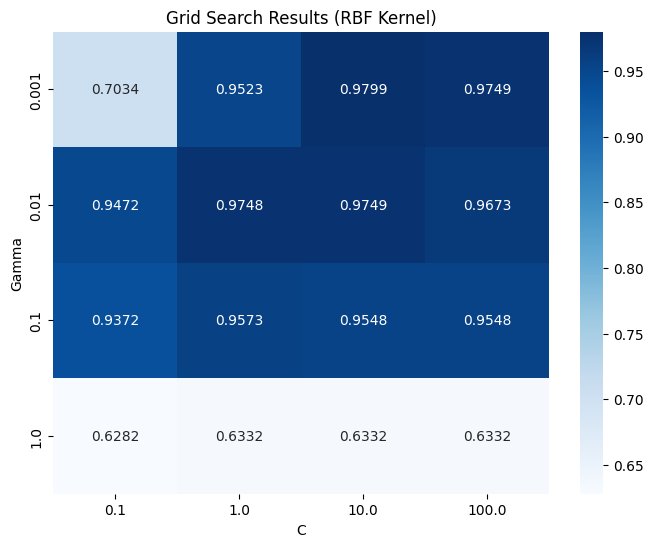


        BEST HYPERPARAMETER RESULTS


,Hyperparameter,Value
0,C,10
1,gamma,0.001
2,kernel,rbf



Best Cross-Validation Score: 0.9799


In [ ]:
# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

# Convert Grid Search results to DataFrame for better display
results_df = pd.DataFrame(grid.cv_results_)

# Display top 5 configurations based on rank
top_results = results_df.nsmallest(5, 'rank_test_score')[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'rank_test_score']]
print("\nTop 5 Hyperparameter Configurations:")
display(top_results)

# Visualization: Heatmap for RBF kernel
rbf_results = results_df[results_df['param_kernel'] == 'rbf']
pivot_table = rbf_results.pivot(index='param_gamma', columns='param_C', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".4f")
plt.title('Grid Search Results (RBF Kernel)')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()

# Retrieve Best Parameters and Score
best_params = grid.best_params_
best_score = grid.best_score_

# Display Best Parameters in a DataFrame for cleaner output
best_params_df = pd.DataFrame(best_params.items(), columns=['Hyperparameter', 'Value'])

print("\n" + "="*40)
print("        BEST HYPERPARAMETER RESULTS")
print("="*40)
display(best_params_df)

print(f"\nBest Cross-Validation Score: {best_score:.4f}")
print("="*40)

####**6. Evaluate the trained model:**
* Compute training and testing accuracy.
* Identify the most important features using SelectFromModel.
* Generate a confusion matrix and calculate:
    * F1-score
    * Precision
    * Recall
    * False Alarm Rate


In [ ]:
# Predict on training and testing data
y_train_pred = grid.predict(X_train_scaled)
y_test_pred = grid.predict(X_test_scaled)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the results
print("\n" + "="*40)
print("          MODEL EVALUATION RESULTS")
print("="*40)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")
print("="*40)


          MODEL EVALUATION RESULTS
Training Accuracy: 0.9874
Testing Accuracy : 0.9708


In [ ]:
# Retrain SVM with Linear Kernel to access coefficients
linear_svm = SVC(kernel='linear', C=grid.best_params_['C'])
linear_svm.fit(X_train_scaled, y_train)

# Apply SelectFromModel to identify important features
selector = SelectFromModel(linear_svm, prefit=True)
selected_features = selector.get_support(indices=True)

# Get feature names from the dataset
feature_names = data.feature_names
important_features = feature_names[selected_features]

# Create a DataFrame to display the important features
important_features_df = pd.DataFrame({
    'Feature': important_features,
    'Coefficient': linear_svm.coef_[0][selected_features]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display Important Features
print("\n" + "="*40)
print("         IMPORTANT FEATURES")
print("="*40)
display(important_features_df)


         IMPORTANT FEATURES


,Feature,Coefficient
10,worst area,-2.992850
0,mean compactness,2.933167
2,mean fractal dimension,-2.681437
4,area error,-2.542383
8,worst texture,-1.935151
9,worst perimeter,-1.677069
3,perimeter error,1.577588
6,concavity error,1.471486
7,worst radius,-1.342885
1,mean concavity,-1.298564


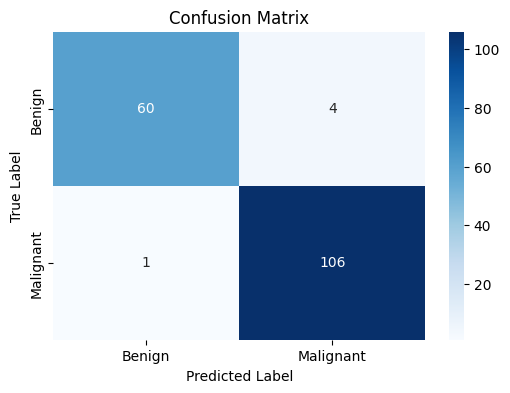


         MODEL PERFORMANCE METRICS

Full Classification Report:

              precision    recall  f1-score   support

      Benign       0.98      0.94      0.96        64
   Malignant       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

False Alarm Rate: 0.0625


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualization of the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# False Alarm Rate Calculation
false_alarm_rate = FP / (FP + TN)

# Generate Classification Report
report = classification_report(y_test, y_test_pred, target_names=['Benign', 'Malignant'], output_dict=True)

# Display Metrics
print("\n" + "="*40)
print("         MODEL PERFORMANCE METRICS")
print("="*40)
print("\nFull Classification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=['Benign', 'Malignant']))
print(f"False Alarm Rate: {false_alarm_rate:.4f}")
print("="*40)


#**GUIDED QUESTIONS**:
You are expected to answer the following questions using your analysis:


---



####**1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?**

The dataset was loaded using **load_breast_cancer()** from **sklearn.datasets**. It was split into 70% training and 30% testing while maintaining class balance using **stratify=y** in** train_test_split()**. Feature scaling was applied using **StandardScaler()** to ensure all numerical values had the same scale, which improves SVM performance. No missing values were present, so no additional imputation was required.



####**2. Why is it necessary to split the dataset into training and testing sets?**

Splitting helps evaluate the model’s performance on unseen data and prevents overfitting. The training set is used to learn patterns, while the testing set measures how well the model generalizes to new cases. Without this split, the model might memorize the training data but fail on real-world predictions.

####**3. What is the role of StandardScaler in SVM training?**


**StandardScaler()** normalizes all features to have a mean of 0 and a standard deviation of 1. Since SVM relies on distance-based calculations, unscaled features with different ranges can bias the model. Standardization ensures all features contribute equally, improving accuracy and convergence speed.

####**4. How does C affect the performance of an SVM model?**


The C parameter controls the trade-off between accuracy and generalization. A small C allows some misclassifications but improves generalization, preventing overfitting. A large C forces the model to classify all training points correctly, which can lead to overfitting and poor performance on new data. Finding the right balance is crucial for optimal results.

####**5. What is the purpose of the kernel function in SVM?**

The kernel function in SVM transforms input data into a higher-dimensional space, enabling SVM to find a linear decision boundary even when the data is not linearly separable. It helps capture complex relationships between features. Common kernels include linear (for linearly separable data), polynomial (for more complex relationships), RBF (for highly non-linear data), and sigmoid (similar to a neural network activation function). Choosing the right kernel affects model performance significantly.

####**6. What were the best hyperparameters found using GridSearchCV?**

The best hyperparameters found using GridSearchCV depend on the dataset and tuning process. GridSearchCV optimizes parameters such as C (regularization parameter) to balance margin width and classification accuracy, gamma (for RBF kernel) to control the influence of each data point, and kernel type (linear, polynomial, or RBF) to best fit the data. The optimal values can be determined by evaluating model performance using cross-validation scores.

####**7. What is a confusion matrix, and how is it interpreted?**

A confusion matrix is a table that summarizes the model's performance by comparing actual and predicted classifications. It consists of four values: True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN). The matrix helps evaluate classification performance by showing misclassifications and correct predictions, making it useful for assessing model accuracy and guiding improvements.

####**8. How are Precision, Recall, and F1-score calculated from the confusion matrix?**

Precision, recall, and F1-score are derived from the confusion matrix. Precision is calculated as TP / (TP + FP) and measures how many positive predictions were actually correct. Recall, also known as sensitivity, is TP / (TP + FN) and measures the model's ability to detect positive instances. The F1-score is the harmonic mean of precision and recall, given by 2 × (Precision × Recall) / (Precision + Recall), providing a balance between the two metrics, especially when dealing with imbalanced datasets.

####**9. If the model does not perform well, what adjustments can be made to improve it?**

To improve performance, you can adjust hyperparameters **(C, gamma, kernel)**, try different kernels **(RBF for complex data)**, select important features using **SelectFromModel()**, increase training data, handle class imbalance using oversampling/undersampling